In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

### Подготовка

In [3]:
df = pd.read_csv("clean_data.csv")

In [4]:
columns_to_one_hot_encode = ['carrier', 'origin', 'dest']
columns_to_normalize = ['arr_delay', 'dep_delay', 'distance']

# One-hot encoding using Pandas
one_hot_encoded_df = pd.get_dummies(df[columns_to_one_hot_encode])

# Normalization using Pandas
normalized_df = (df[columns_to_normalize] - df[columns_to_normalize].mean()) / df[columns_to_normalize].std()

# Combine the processed data
processed_df = pd.concat([one_hot_encoded_df, normalized_df], axis=1)
processed_df

,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_FL,carrier_HA,carrier_MQ,...,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA,arr_delay,dep_delay,distance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.096205,-0.267927,0.477894
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.302132,-0.216675,0.499637
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.599582,-0.267927,0.055269
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.567336,-0.344805,0.717064
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.727502,-0.472935,-0.389099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327299,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,-0.544456,-0.447309,-1.140584
327300,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.613098,-0.575438,-1.015563
327301,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.521575,-0.447309,-1.065843
327302,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.132602,-0.011667,-1.170480


In [5]:
X_train, X_test, y_train, y_test = train_test_split(processed_df, df.is_delayed, test_size=0.2, random_state=12)

### K-Means (К-средних)

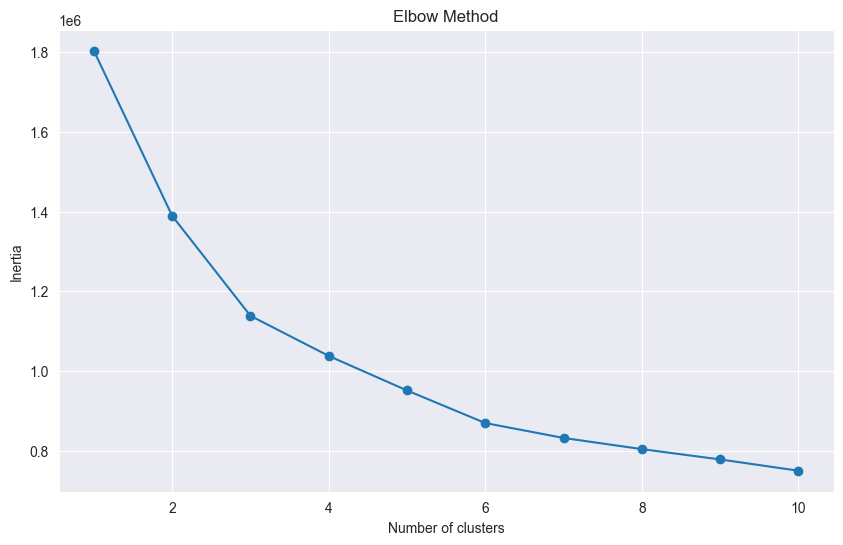

In [6]:
inertia = []
for i in range(1, 11):  # testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(processed_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [7]:
km = KMeans(n_clusters=3, init = 'k-means++', max_iter = 400, n_init = 10, random_state=12)
km.fit(X_train)
km_res = km.predict(X_test)
print(metrics.rand_score(y_test, km_res))

0.5317398039978306


In [8]:
print('KMeans:')
print('macro', metrics.jaccard_score(y_test, km_res, average='macro'))
print('micro', metrics.jaccard_score(y_test, km_res, average='micro'))
print('weighted', metrics.jaccard_score(y_test, km_res, average='weighted'))

KMeans:
macro 0.16660387400375784
micro 0.24464767844240787
weighted 0.2405715935743314


In [9]:
#[-1; 1] - at 6 cl = 0.195
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_train, km.labels_))
#the bigger the better - at 6 cl = 56264
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X_train, km.labels_))
#the lower the better - at 6 cl - 1.605
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X_train, km.labels_))

Silhouette Coefficient: 0.239
Calinski-Harabasz Index: 76455.492
Davies-Bouldin Index: 1.387


Text(0, 0.5, 'Data')

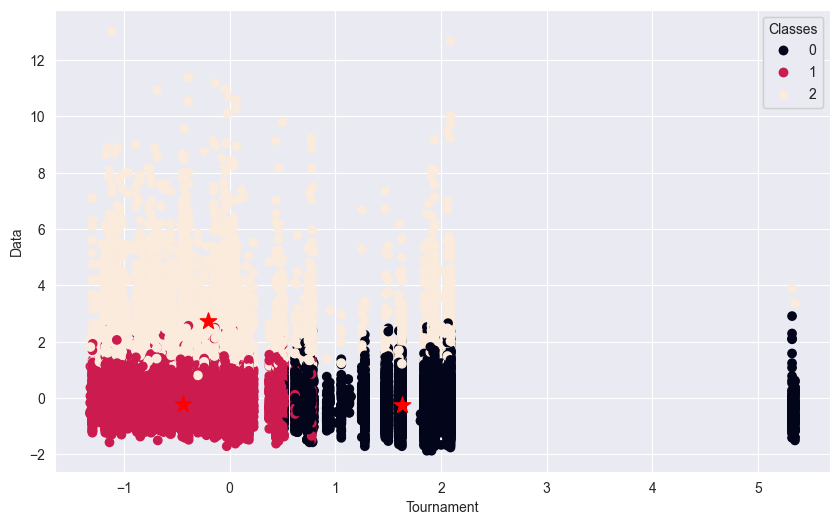

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_test.iloc[:,-1], X_test.iloc[:,-3], c = km_res)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Classes")
scatter= ax.scatter(km.cluster_centers_[:,-1], km.cluster_centers_[:,-3], s = 150, c = 'red', marker = '*')
ax.add_artist(legend1)
plt.xlabel("Tournament")
plt.ylabel("Data")

### DBSCAN

In [ ]:
dbscan = DBSCAN(eps=100, min_samples=40, n_jobs=-1)
dbscan_res = dbscan.fit_predict(X_train)
print(set(dbscan_res))

In [ ]:
print('DBSCAN')
print('Rand:', metrics.rand_score(y_train, dbscan_res))
print('macro', metrics.jaccard_score(y_test, (dbscan_res > -1), average='macro'))
print('micro', metrics.jaccard_score(y_test, (dbscan_res > -1), average='micro'))
print('weighted', metrics.jaccard_score(y_test, (dbscan_res > -1), average='weighted'))

In [ ]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_train, dbscan_res))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X_train, dbscan_res))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X_train, dbscan_res))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x_training_data.iloc[:,-1], x_training_data.iloc[:,-3], c = dbscan_res)
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Classes")
ax.add_artist(legend1)
plt.xlabel("Tournament")
plt.ylabel("Data")

### Иерархическая кластеризация

In [ ]:
ag = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
ag_res = ag.fit_predict(X_train)
print(set(ag.labels_))

In [ ]:
print('Иерархическая кластеризация:')
print('Rand:', metrics.rand_score(y_train, ag_res))
print('macro', metrics.jaccard_score(y_test, ag_res, average='macro'))
print('micro', metrics.jaccard_score(y_test,  ag_res, average='micro'))
print('weighted', metrics.jaccard_score(y_test,  ag_res, average='weighted'))

In [ ]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_training_data, ag_res))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x_training_data, ag_res))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x_training_data, ag_res))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x_training_data.iloc[:,-1], x_training_data.iloc[:,-3], c = ag_res)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Classes")
ax.add_artist(legend1)
plt.xlabel("Tournament")
plt.ylabel("Data")